# Neural Network using Tensorflow.kerasAssignmemt
## I. Các layer cơ bản và tham số của tensorflow.keras
### 1. Các layer cơ bản
#### 1.1. Dense layer
- Dense Player là một layer cơ bản trong tensorflow.keras. Nó là một layer fully connected layer, có nghĩa là mỗi node trong layer này sẽ kết nối với tất cả các node trong layer trước đó.
- Sequential model là một model mà các layer được xếp chồng lên nhau theo thứ tự tuần tự. Ví dụ như layer 1 sẽ kết nối với layer 2, layer 2 sẽ kết nối với layer 3, layer 3 sẽ kết nối với layer 4, ...
- Activation function là hàm kích hoạt của layer. Nó sẽ nhận đầu vào là tổng trọng số của các node trong layer trước đó và bias, sau đó trả về output của layer.
- Một số loại tham số:
    - **units**: số lượng node trong layer
    - **activation**: hàm kích hoạt của layer
    - **use_bias**: có sử dụng bias hay không
    - **kernel_initializer**: phương pháp khởi tạo trọng số
    - **bias_initializer**: phương pháp khởi tạo bias
    - **kernel_regularizer**: phương pháp regularization cho trọng số
    - **bias_regularizer**: phương pháp regularization cho bias
    - **activity_regularizer**: phương pháp regularization cho output
    - **kernel_constraint**: phương pháp constraint cho trọng số
    - **bias_constraint**: phương pháp constraint cho bias
- Phương thức **compile()** sẽ cấu hình các tham số cho model. Một số tham số:
    - **optimizer**: phương pháp tối ưu hóa
    - **loss**: hàm loss
    - **metrics**: danh sách các metric để đánh giá model
    - **loss_weights**: trọng số của các hàm loss
    - **sample_weight_mode**: phương pháp tính trọng số cho mỗi sample
    - **weighted_metrics**: danh sách các metric được đánh trọng số
- Phương thức **fit()** sẽ train model. Một số tham số:
    - **x**: input của model
    - **y**: output của model
    - **batch_size**: số lượng sample trong mỗi batch
    - **epochs**: số lượng epoch
    - **verbose**: cách hiển thị quá trình train
    - **validation_data**: dữ liệu validation
    - **shuffle**: có shuffle dữ liệu sau mỗi epoch hay không
    - **class_weight**: trọng số cho mỗi class
    - **sample_weight**: trọng số cho mỗi sample
    - **initial_epoch**: epoch bắt đầu train
    - **steps_per_epoch**: số lượng batch trong mỗi epoch
    - **validation_steps**: số lượng batch trong mỗi epoch của validation data
    - **validation_freq**: tần suất tính validation
    - **max_queue_size**: số lượng sample trong queue
    - **workers**: số lượng worker
    - **use_multiprocessing**: có sử dụng multiprocessing hay không
- Ví dụ:
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32)
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
X = data.drop('quality', axis=1)
y = data['quality']

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:992)>

In [4]:
y_binary = (y > 5).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Epoch 1/10
40/40 [==============================] - 1s 4ms/step - loss: 0.6250 - accuracy: 0.6521 - val_loss: 0.5647 - val_accuracy: 0.7156
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7303 - val_loss: 0.5339 - val_accuracy: 0.7094
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7318 - val_loss: 0.5253 - val_accuracy: 0.7312
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.7498 - val_loss: 0.5179 - val_accuracy: 0.7312
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7522 - val_loss: 0.5164 - val_accuracy: 0.7219
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7623 - val_loss: 0.5120 - val_accuracy: 0.7312
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 0.7623 - val_loss: 0.5087 - val_accuracy: 0.7344
Epoch 8/10
40/40 [==

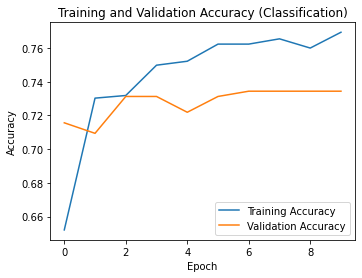

In [7]:
# Build the neural network model for Classification
model_classification = Sequential()
model_classification.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model_classification.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history_classification = model_classification.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_classification = model_classification.predict(X_test)
y_pred_classification = (y_pred_classification > 0.5).astype(int)

# For classification, use accuracy_score
accuracy_classification = accuracy_score(y_test, y_pred_classification)
print(f'Accuracy (Classification): {accuracy_classification}')

# Vẽ đồ thị khi train cho Classification
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_classification.history['accuracy'], label='Training Accuracy')
plt.plot(history_classification.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Classification)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Epoch 1/10
40/40 [==============================] - 1s 5ms/step - loss: 0.3329 - val_loss: 0.2176
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.2035 - val_loss: 0.1972
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 0.1858 - val_loss: 0.1907
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1779 - val_loss: 0.1867
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1714 - val_loss: 0.1835
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1691 - val_loss: 0.1808
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1655 - val_loss: 0.1791
Epoch 8/10
40/40 [==============================] - 0s 5ms/step - loss: 0.1628 - val_loss: 0.1794
Epoch 9/10
40/40 [==============================] - 0s 5ms/step - loss: 0.1597 - val_loss: 0.1757
Epoch 10/10
10/10 [==============================] - 0s 1ms/step
Mean Squared Error (Regression): 0.17309021584734963


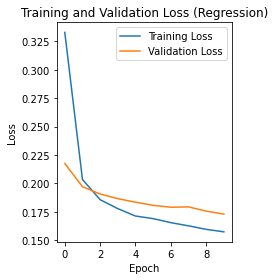

In [8]:
# Build the neural network model for Regression
model_regression = Sequential()
model_regression.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model_regression.add(Dense(units=1, activation='linear'))

# Compile the model
model_regression.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history_regression = model_regression.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_regression = model_regression.predict(X_test)

# For regression, use mean_squared_error
mse_regression = mean_squared_error(y_test, y_pred_regression)
print(f'Mean Squared Error (Regression): {mse_regression}')

# Vẽ đồ thị khi train cho Regression
plt.subplot(1, 2, 2)
plt.plot(history_regression.history['loss'], label='Training Loss')
plt.plot(history_regression.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Regression)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()